<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

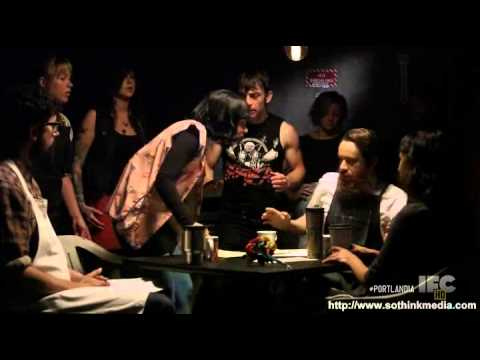

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2021-08-02 21:04:05--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     149  --.-KB/s    in 0s      

2021-08-02 21:04:05 (5.84 MB/s) - ‘requirements.txt’ saved [149/149]

     |████████████████████████████████| 24.2 MB 77 kB/s 
     |████████████████████████████████| 1.6 MB 32.6 MB/s 
     |████████████████████████████████| 10.4 MB 32.5 MB/s 
     |████████████████████████████████| 7.1 MB 34.5 MB/s 
     |████████████████████████████████| 208 kB 74.2 MB/s 
     |████████████████████████████████| 2.2 MB 46.4 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py

In [3]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 26.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [2]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

# you should be able to load the language model into memory now that you've downloaded it
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [26]:
shops.shape

(7616, 3)

In [27]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coffee_shop_name  7616 non-null   object
 1   full_review_text  7616 non-null   object
 2   star_rating       7616 non-null   object
dtypes: object(3)
memory usage: 178.6+ KB


In [28]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [34]:
# Lambda function to create a ratings column with only float values
shops['star_rating_float'] = shops['star_rating'].apply(lambda x: float(str(x).rstrip(' star rating')))

In [36]:
shops['star_rating_float']

0       5.0
1       4.0
2       4.0
3       2.0
4       4.0
       ... 
7611    4.0
7612    5.0
7613    4.0
7614    3.0
7615    4.0
Name: star_rating_float, Length: 7616, dtype: float64

In [39]:
# Lambda function to identify date in full_review_text and create a separate 'date' column
shops['date'] = shops['full_review_text'].apply(lambda text: re.findall('\d+\/\d+\/\d+', text)[0])

In [40]:
# Create datetime column for date of review
shops['datetime'] = pd.to_datetime(shops['date'], infer_datetime_format=True)

In [41]:
# Remove the dates from the full_review_text
shops['review_text'] = shops['full_review_text'].apply(lambda text: re.sub('\d+\/\d+\/\d+', '', text))

In [42]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_float,date,datetime,review_text
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5.0,11/25/2016,2016-11-25,1 check-in Love love loved the atmosphere! E...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4.0,12/2/2016,2016-12-02,"Listed in Date Night: Austin, Ambiance in Au..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4.0,11/30/2016,2016-11-30,1 check-in Listed in Brunch Spots I loved th...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2.0,11/25/2016,2016-11-25,Very cool decor! Good drinks Nice seating H...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4.0,12/3/2016,2016-12-03,1 check-in They are located within the North...


In [43]:
def count(tokens):
  """
  Calculates basic statistics for tokens to assist in analysis.
  """
  # Variable to store the count of each token
  word_count = Counter()

  # Stores the number of documents in which each token appears
  appears_in = Counter()

  total_docs = len(tokens)

  for token in tokens:
    # Update the token count
    word_count.update(token)
    # Update the appearances of each token using set() to avoid duplicates
    appears_in.update(set(token))

  # Build DF for the word count
  temp = zip(word_count.keys(), word_count.values())
  wc = pd.DataFrame(data = temp, columns = ['word', 'count'])

  # Rank the tokens
  wc['rank'] = wc['count'].rank(method = 'first', ascending = False)
  total = wc['count'].sum()

  # Calculate the percent appearance of each token
  wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total * 100)

  # Calculate the cumulative percent total for tokens
  wc = wc.sort_values(by='rank')
  wc['cul_pct_total'] = wc['pct_total'].cumsum()

  # Create DF for the document statistics
  temp2 = zip(appears_in.keys(), appears_in.values())
  ac = pd.DataFrame(data = temp2, columns = ['word', 'appears_in'])

  # Merge DFs for word count and appearance stats
  wc = ac.merge(wc, on = 'word')

  # Calculate the percentage in appears_in column
  wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs * 100)

  return wc.sort_values(by = 'rank')

In [46]:
# Create a SpaCy tokenizer
# Corpus level tokens
tokens = []

for doc in nlp.pipe(shops['review_text']):
  # Individual review tokens
  doc_tokens = []

  for token in doc:
    doc_tokens.append(token.text)

  tokens.append(doc_tokens)

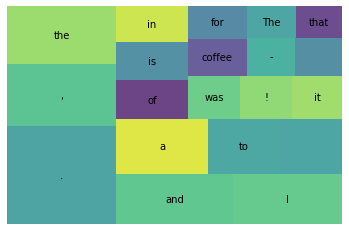

In [48]:
# Create column with the SpaCy tokens
shops['spacy_tokens'] = tokens

# pass DF through count function for stats
wc = count(shops['spacy_tokens'])

# sort and keep top 20 tokens for plotting
wc_top20 = wc[wc['rank'] <= 20]

# plot stats
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

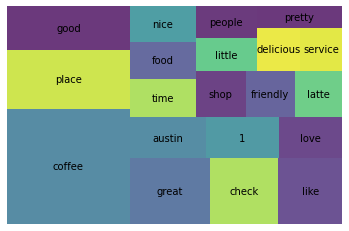

In [53]:
# Create a SpaCy tokenizer w/o stop_words
# Corpus level tokens
tokens = []

for doc in nlp.pipe(shops['review_text'], batch_size=500):
  # Individual review tokens
  doc_tokens = []

  for token in doc:
    if (token.is_stop == False) & (token.is_punct == False) & \
    (token.is_space == False):
      doc_tokens.append(token.text.lower())

  tokens.append(doc_tokens)

# Create column with the SpaCy tokens
shops['spacy_tokens'] = tokens

# pass DF through count function for stats
wc = count(shops['spacy_tokens'])

# sort and keep top 20 tokens for plotting
wc_top20 = wc[wc['rank'] <= 20]

# plot stats
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
wc.head(50)

In [63]:
# Extend the Stop_Words library with stopwords specific to this data
STOP_WORDS = nlp.Defaults.stop_words.union(['check','check-in', 'check-ins',
                                            'in', 'ins', 'i', 'it', "it's",
                                            'it.', 'the', 'this', '1'])

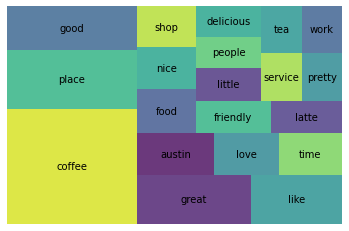

In [64]:
# Create a SpaCy tokenizer w/o Extended Stopwords
# Corpus level tokens
tokens = []

for doc in nlp.pipe(shops['review_text'], batch_size=500):
  # Individual review tokens
  doc_tokens = []

  for token in doc:
    if (token.is_punct == False) & (token.is_space == False) & \
    (token.text.lower() not in STOP_WORDS):
      doc_tokens.append(token.text.lower())

  tokens.append(doc_tokens)

# Create column with the SpaCy tokens
shops['spacy_tokens'] = tokens

# pass DF through count function for stats
wc = count(shops['spacy_tokens'])

# sort and keep top 20 tokens for plotting
wc_top20 = wc[wc['rank'] <= 20]

# plot stats
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [65]:
wc.head(15)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
10,coffee,4911,10539,1.0,2.967186,2.967186,64.482668
71,place,3665,5444,2.0,1.532722,4.499908,48.122374
153,good,2792,3986,3.0,1.122232,5.622141,36.659664
129,great,2843,3933,4.0,1.107310,6.729451,37.329307
167,like,2142,3125,5.0,0.879823,7.609274,28.125000
42,austin,1838,2341,6.0,0.659093,8.268367,24.133403
31,love,1499,1942,7.0,0.546757,8.815125,19.682248
506,time,1487,1905,8.0,0.536340,9.351465,19.524685
335,food,1389,1868,9.0,0.525923,9.877388,18.237920
46,nice,1470,1751,10.0,0.492983,10.370370,19.301471


In [70]:
# Function to get lemmas from the review_text with Extended Stopwords
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    ### BEGIN SOLUTION
    for token in doc: 
        if ((token.is_space == False) & (token.is_punct == False) & 
            (token.pos_ != 'PRON') & (token.text.lower() not in STOP_WORDS)):
            lemmas.append(token.lemma_)
    ### END SOLUTION
    
    return lemmas

In [71]:
shops['lemmas'] = shops['review_text'].apply(get_lemmas)

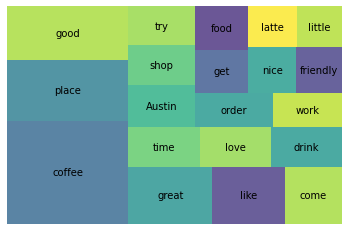

In [72]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [73]:
wc.head(15)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
11,coffee,4856,10176,1.0,2.866511,2.866511,63.760504
70,place,3873,6018,2.0,1.695230,4.561742,50.853466
154,good,3556,5291,3.0,1.490439,6.052181,46.691176
128,great,2839,3920,4.0,1.104238,7.156419,37.276786
166,like,2274,3380,5.0,0.952123,8.108542,29.858193
398,come,1932,2638,6.0,0.743107,8.851649,25.367647
501,time,1761,2381,7.0,0.670712,9.522361,23.122374
29,love,1797,2332,8.0,0.656909,10.179270,23.595063
33,drink,1636,2332,9.0,0.656909,10.836178,21.481092
60,Austin,1785,2274,10.0,0.640571,11.476749,23.437500


In [74]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_float,date,datetime,review_text,spacy_tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5.0,11/25/2016,2016-11-25,1 check-in Love love loved the atmosphere! E...,"[love, love, loved, atmosphere, corner, coffee...","[Love, love, love, atmosphere, corner, coffee,..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4.0,12/2/2016,2016-12-02,"Listed in Date Night: Austin, Ambiance in Au...","[listed, date, night, austin, ambiance, austin...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4.0,11/30/2016,2016-11-30,1 check-in Listed in Brunch Spots I loved th...,"[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2.0,11/25/2016,2016-11-25,Very cool decor! Good drinks Nice seating H...,"[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4.0,12/3/2016,2016-12-03,1 check-in They are located within the North...,"[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f..."


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [76]:
# Isolate bad coffee shops (star_rating less than or equal to 3.0) in separate DF
cond_bad = shops['star_rating_float'] <= 3.0
shops_bad = shops[cond_bad]
shops_bad.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_float,date,datetime,review_text,spacy_tokens,lemmas
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2.0,11/25/2016,2016-11-25,Very cool decor! Good drinks Nice seating H...,"[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drink, nice, seating, over..."
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating,3.0,10/25/2016,2016-10-25,"1 check-in Ok, let's try this approach... P...","[ok, let, try, approach, pros, music, seating,...","[ok, let, try, approach, pro, music, Seating, ..."
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3.0 star rating,3.0,11/20/2016,2016-11-20,"The store has A+ decoration, but honestly, t...","[store, a+, decoration, honestly, coffee, good...","[store, A+, decoration, honestly, coffee, good..."
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3.0 star rating,3.0,11/17/2016,2016-11-17,1 check-in Listed in 2016 - The Third Time i...,"[listed, 2016, time, charm, factory, a+, decor...","[list, 2016, Time, Charm, Factory, A+, decor, ..."
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0 star rating,1.0,12/2/2016,2016-12-02,"Okay, so after visiting my friends in LA and...","[okay, visiting, friends, la, trying, mint, mo...","[okay, visit, friend, LA, try, mint, mojito, i..."


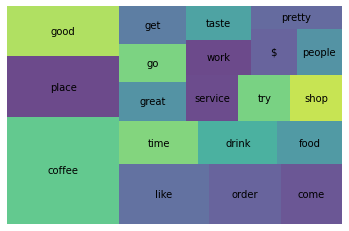

In [77]:
# Word counts and Visualization of lemmas in bad coffee shops
wc_bad = count(shops_bad['lemmas'])
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [78]:
#  Isolate good coffee shops (star_rating more than or equal to 4.0) in separate DF
cond_good = shops['star_rating_float'] >= 4.0
shops_good = shops[cond_good]
shops_good.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_float,date,datetime,review_text,spacy_tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5.0,11/25/2016,2016-11-25,1 check-in Love love loved the atmosphere! E...,"[love, love, loved, atmosphere, corner, coffee...","[Love, love, love, atmosphere, corner, coffee,..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4.0,12/2/2016,2016-12-02,"Listed in Date Night: Austin, Ambiance in Au...","[listed, date, night, austin, ambiance, austin...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4.0,11/30/2016,2016-11-30,1 check-in Listed in Brunch Spots I loved th...,"[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4.0,12/3/2016,2016-12-03,1 check-in They are located within the North...,"[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f..."
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,4.0,11/20/2016,2016-11-20,1 check-in Very cute cafe! I think from the ...,"[cute, cafe, think, moment, stepped, find, cut...","[cute, cafe, think, moment, step, find, cute, ..."


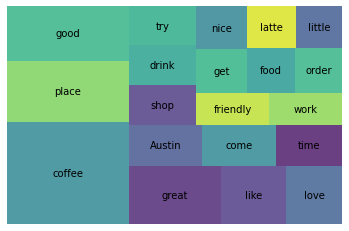

In [79]:
# Word counts and Visualization of lemmas in good coffee shops
wc_good = count(shops_good['lemmas'])
wc_good_top20 = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

